# Environment Setup

> Make sure to use the  **3.10 - SDK v2** kernel

In [1]:
pip show azure-ai-ml

Name: azure-ai-ml
Version: 1.16.1
Summary: Microsoft Azure Machine Learning Client Library for Python
Home-page: https://github.com/Azure/azure-sdk-for-python
Author: Microsoft Corporation
Author-email: azuresdkengsysadmins@microsoft.com
License: MIT License
Location: /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages
Requires: azure-common, azure-core, azure-mgmt-core, azure-storage-blob, azure-storage-file-datalake, azure-storage-file-share, colorama, isodate, jsonschema, marshmallow, msrest, opencensus-ext-azure, opencensus-ext-logging, pydash, pyjwt, pyyaml, strictyaml, tqdm, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.


# Connect to the workspace

In [2]:
from azure.identity import DefaultAzureCredential, InteractiveBrowserCredential
from azure.ai.ml import MLClient

try:
    credential = DefaultAzureCredential()
    # Check if given credential can get token successfully.
    credential.get_token("https://management.azure.com/.default")
except Exception as ex:
    # Fall back to InteractiveBrowserCredential in case DefaultAzureCredential not work
    credential = InteractiveBrowserCredential()

In [3]:
# Get a handle to workspace
ml_client = MLClient.from_config(credential=credential)

Found the config file in: /config.json


# Wait a minute...

Remember the ML workflow ?

The typical machine learning workflow in Azure Machine Learning (Azure ML) consists of the following key steps:

1. **Data Preparation**:
   - Gather and preprocess the data required for your machine learning tasks.
   - This may involve tasks like data cleaning, feature engineering, and data transformation.
   - The data can be stored in the workspace blob store or other supported data sources.

2. **Experiment Creation**:
   - Define your machine learning experiment, including the algorithm, hyperparameters, and other configurations.
   - Create a training script that encapsulates the model training logic.
   - Set up the compute target (e.g., virtual machine, Azure Kubernetes Service) where the experiment will be run.

3. **Model Training**:
   - Submit the experiment to the selected compute target for training.
   - The training script is executed, and the model is trained on the prepared data.
   - The trained model is registered in the Azure ML model registry.

4. **Model Evaluation**:
   - Evaluate the performance of the trained model using appropriate metrics and techniques.
   - This may involve tasks like model validation, hyperparameter tuning, and model comparison.
   - The evaluation results are stored in the artifact store.

5. **Model Deployment**:
   - Package the trained model for deployment as a web service or other deployment target.
   - Deploy the model to a compute target (e.g., Azure Container Instances, Azure Kubernetes Service) for real-time inference or batch processing.
   - Configure the deployment to handle incoming requests and provide predictions.

6. **Monitoring and Retraining**:
   - Monitor the deployed model's performance and track any drift or degradation in its accuracy.
   - Retrain the model periodically using new data or updated algorithms to maintain its performance.
   - The retrained model can be registered and redeployed, following the same workflow.

Throughout this workflow, Azure ML provides various tools, services, and capabilities to streamline the process, such as:
- Experiment management and tracking
- Automated machine learning (AutoML)
- Model management and deployment
- Monitoring and logging
- Collaboration and sharing

The specific steps and tools used may vary depending on the complexity of the machine learning problem and the requirements of your project.

# Load the data for experimentation

>You can get the code below, from the data asset tab.

In [18]:
#from azure.ai.ml import MLClient
import pandas as pd
from azure.identity import DefaultAzureCredential

# If credential is not defined above
data_asset = ml_client.data.get("diabetes", version="1")

df = pd.read_csv(data_asset.path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Audit & Explore the data

In [5]:
# get data infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Questions :

1. Do we need dome data preparation ?
2. What should we do next ?

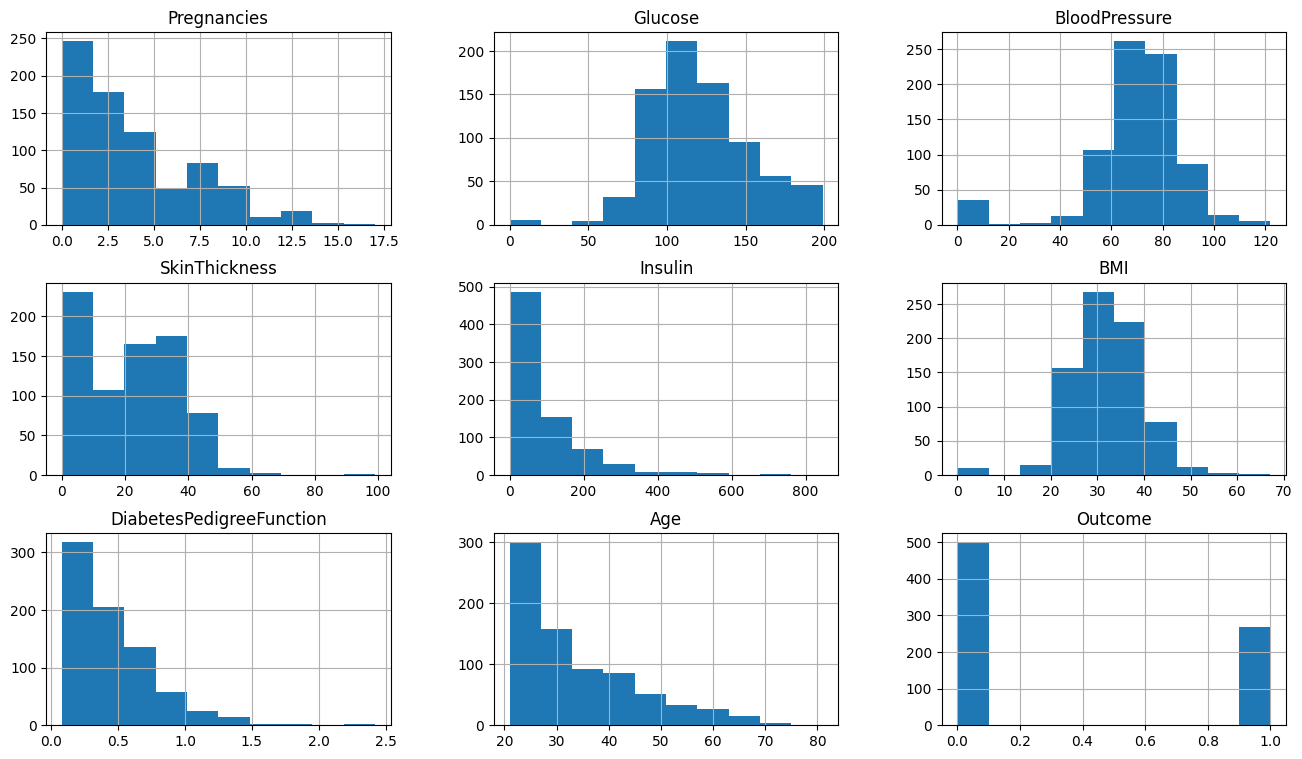

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(figsize=(16, 9));

### Questions:
1. What do you see ?
2. how do you interpret these graphs (from an ML point of view) ?


Each histogram shows the frequency distribution of the respective variable across the dataset. From a machine learning perspective, these graphs provide valuable insights:

- **Feature distributions**: The histograms show the distribution of each feature, which is crucial for understanding the dataset and potential preprocessing needs.

- **Imbalanced features**: Some features like `Insulin` and `Glucose` show highly skewed distributions, which might require normalization or transformation before model training.

- **Potential correlations**: Features like `BMI`, `Glucose`, and `Blood Pressure` show distributions that might correlate with diabetes risk.

- **Age distribution**: The age histogram shows a right-skewed distribution, with most subjects being younger and fewer older subjects.

- **Preprocessing needs**: Features like `Skin Thickness` and `Insulin` have many zero values, which might indicate missing data that needs handling.

- **Feature engineering opportunities**: The Diabetes Pedigree Function could be a engineered feature combining family history information.

| Aspect | Description |
|--------|-------------|
| Definition | A synthetic feature quantifying genetic influence on diabetes risk |
| Purpose | Condense complex familial diabetes information into a single numeric value |
| Calculation Factors | - Number of relatives with diabetes<br>- Degree of relation (e.g., parent, sibling)<br>- Age of onset in affected relatives<br>- Possibly severity of diabetes in family members |
| Distribution | Right-skewed; most individuals have lower values, with a long tail for higher genetic risk |
| ML Implications | - Likely high predictive power<br>- May have non-linear relationships with outcome<br>- Might benefit from normalization or log-transformation |
| Feature Engineering Example | Demonstrates distillation of complex, multi-faceted information into a single feature |
| Potential for Exploration | - Investigate exact calculation method<br>- Identify significant risk thresholds |
| Limitations | - Needs validation to avoid unintended biases<br>- May not capture all aspects of genetic risk |
| Value for ML | Encapsulates domain expertise, providing a template for quantifying complex risk factors |

- **Outlier detection**: Some features (e.g., Pregnancies, Glucose) show potential outliers that might need investigation.

These insights would guide the data preprocessing, feature engineering, and model selection stages in a machine learning pipeline for predicting diabetes risk or related health outcomes.

Few variables might need scaling or normalizing (looking at the distributions). 

**But here let's just pretend that everything is fine (NO IT'S NOT!! :wink)**

# Train a model baseline

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare the data
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"training accuracy: {model.score(X_train, y_train)}")
print(f"Model accuracy: {accuracy}")

training accuracy: 0.7703583061889251
Model accuracy: 0.7467532467532467


After training a logistic regression model using scikit-learn, you can extract the coefficients (or weights) of the features and use them to plot the feature importance. Here's how:

**Method 1: Using coef_ attribute**

In scikit-learn, the coefficients of the features are stored in the `coef_` attribute of the logistic regression object.

```python
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
X = ...  # your feature matrix
y = ...  # your target vector
logreg = LogisticRegression()
logreg.fit(X, y)

# Get the coefficients (weights) of the features
coefficients = logreg.coef_

# Plot the feature importance
import matplotlib.pyplot as plt

plt.bar(range(len(coefficients[0])), abs(coefficients[0]))
plt.xlabel('Feature Index')
plt.ylabel('Absolute Weight')
plt.title('Feature Importance')
plt.show()
```

This will plot a bar chart with the absolute values of the coefficients on the y-axis and the feature indices on the x-axis. The features with larger weights (coefficients) are more important.

**Method 2: Using permutation importance**

Another way to estimate feature importance is by using permutation importance, which measures how much the model's performance changes when a feature is randomly shuffled.

```python
from sklearn.inspection import permutation_importance

# Train a logistic regression model
X = ...  # your feature matrix
y = ...  # your target vector
logreg = LogisticRegression()
logreg.fit(X, y)

# Calculate permutation importance for each feature
importances = permutation_importance(logreg, X, y, n_repeats=10, random_state=42).importances_mean

# Plot the feature importance
plt.bar(range(len(importances)), importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.show()
```

Both methods can give you an idea of which features are most important in your logistic regression model. However, keep in mind that the permutation importance method can be computationally expensive for large datasets.

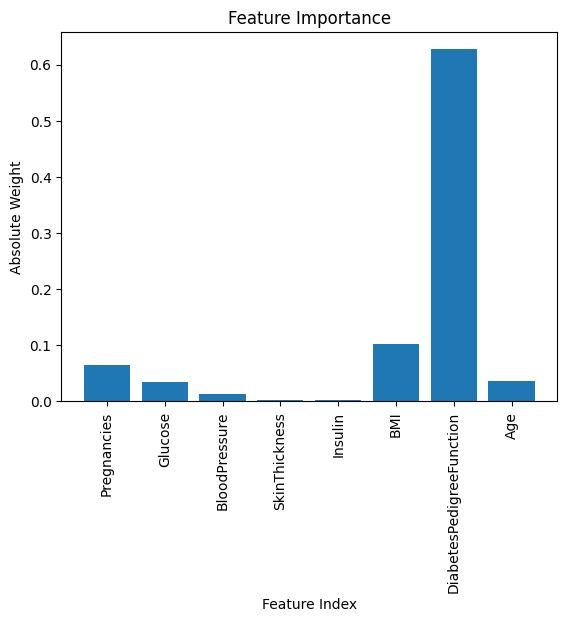

In [9]:
# Plot the feature importance
import matplotlib.pyplot as plt

# Challenge for later - plot the feature importance
# Get the coefficients (weights) of the features
coefficients = model.coef_

plt.bar(X_train.columns.tolist(), abs(coefficients[0]))
plt.xlabel('Feature Index')
plt.ylabel('Absolute Weight')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

# What do you think about the next steps

1. How do you find these results ? What could you say about it ?
2. What should we do next ?

# Training Pipeline v0

In [10]:
%%writefile diabetes_training.py
# Import libraries
import argparse
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import mlflow
import mlflow.sklearn

# Parse arguments
parser = argparse.ArgumentParser()
parser.add_argument("--data", type=str, help="Path to input data")
parser.add_argument("--reg_rate", type=float, default=0.01, help="Regularization rate")
parser.add_argument("--registered_model_name", type=str, help="Model name")
args = parser.parse_args()


# Start MLflow run
with mlflow.start_run():

    # Enable autologging
    mlflow.sklearn.autolog()

    # log the regularization rate
    mlflow.log_param("regularization_rate", args.reg_rate)

    # load the diabetes dataset
    print("Loading Data...")
    diabetes = pd.read_csv(args.data)

    # Separate features and labels
    X = diabetes.drop("Outcome", axis=1)
    y = diabetes["Outcome"]

    # Split data into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

    # Train a logistic regression model
    print('Training a logistic regression model with regularization rate of', args.reg_rate)
    model = LogisticRegression(C=1/args.reg_rate, solver="liblinear", max_iter=1000).fit(X_train, y_train)

    # calculate accuracy
    y_hat = model.predict(X_test)
    acc = accuracy_score(y_test, y_hat)
    print('Accuracy:', acc)
    mlflow.log_metric("accuracy", acc)

    # calculate AUC
    y_scores = model.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_scores[:,1])
    print('AUC: ' + str(auc))
    mlflow.log_metric("auc", auc)

    # Log the feature names
    mlflow.log_param("features", list(X.columns))

    # Registering the model to the workspace
    print("Registering the model via MLFlow")
    mlflow.sklearn.log_model(
        sk_model=model,
        registered_model_name=args.registered_model_name,
        artifact_path=args.registered_model_name,
    )

    # Saving the model to a file
    mlflow.sklearn.save_model(
        sk_model=model,
        path=os.path.join(args.registered_model_name, "trained_model"),
    )

print("Run completed. Model saved with MLflow")

Writing diabetes_training.py


In [11]:
# Display the contents of the file
!cat diabetes_training.py

# Import libraries
import argparse
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import mlflow
import mlflow.sklearn

# Parse arguments
parser = argparse.ArgumentParser()
parser.add_argument("--data", type=str, help="Path to input data")
parser.add_argument("--reg_rate", type=float, default=0.01, help="Regularization rate")
parser.add_argument("--registered_model_name", type=str, help="Model name")
args = parser.parse_args()


# Start MLflow run
with mlflow.start_run():

    # Enable autologging
    mlflow.sklearn.autolog()

    # log the regularization rate
    mlflow.log_param("regularization_rate", args.reg_rate)

    # load the diabetes dataset
    print("Loading Data...")
    diabetes = pd.read_csv(args.data)

    # Separate features and labels
    X = diabetes.drop("Outcome", axis=1)
    y = diabetes["Outcome"]

    

What do you think about this script ?

Once again, let's pretend it's fine...

# Training script v2

Far from best using a function.

In [12]:
%%writefile diabetes_training_v2.py
import os
import argparse
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

def main():
    """Main function of the script."""

    # Input arguments
    parser = argparse.ArgumentParser()
    parser.add_argument("--data", type=str, help="Path to input data")
    parser.add_argument("--test_train_ratio", type=float, required=False, default=0.30)
    parser.add_argument("--reg_rate", type=float, required=False, default=0.01, help="Regularization rate")
    parser.add_argument("--registered_model_name", type=str, help="Model name")
    args = parser.parse_args()

    # Start Logging
    mlflow.start_run()

    # Enable autologging
    mlflow.sklearn.autolog()

    ###################
    # <Prepare the data>
    ###################
    print(" ".join(f"{k}={v}" for k, v in vars(args).items()))
    print("Input data:", args.data)

    # Load the diabetes dataset
    diabetes = pd.read_csv(args.data)

    mlflow.log_metric("num_samples", diabetes.shape[0])
    mlflow.log_metric("num_features", diabetes.shape[1] - 1)

    # Split data into training set and test set
    train_df, test_df = train_test_split(
        diabetes,
        test_size=args.test_train_ratio,
        random_state=0
    )
    ###################
    # </Prepare the data>
    ###################

    ##################
    # <Train the model>
    ##################
    # Extracting the label column
    y_train = train_df.pop("Outcome")
    X_train = train_df.values

    # Extracting the label column for test set
    y_test = test_df.pop("Outcome")
    X_test = test_df.values

    print(f"Training with data of shape {X_train.shape}")

    # Train a logistic regression model
    model = LogisticRegression(C=1/args.reg_rate, solver="liblinear", max_iter=1000)
    model.fit(X_train, y_train)

    # Make predictions
    y_hat = model.predict(X_test)
    acc = accuracy_score(y_test, y_hat)
    print('Accuracy:', acc)
    mlflow.log_metric("accuracy", acc)

    # Calculate AUC
    y_scores = model.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_scores[:, 1])
    print('AUC:', auc)
    mlflow.log_metric("auc", auc)
    ##################
    # </Train the model>
    ##################

    ##########################
    # <Save and register model>
    ##########################
    # Registering the model to the workspace
    print("Registering the model via MLFlow")
    mlflow.sklearn.log_model(
        sk_model=model,
        registered_model_name=args.registered_model_name,
        artifact_path=args.registered_model_name,
    )

    # Saving the model to a file
    mlflow.sklearn.save_model(
        sk_model=model,
        path=os.path.join(args.registered_model_name, "trained_model"),
    )
    
    # Stop Logging
    mlflow.end_run()

if __name__ == "__main__":
    main()


Writing diabetes_training_v2.py


In [13]:
# Display the contents of the file
!cat diabetes_training_v2.py

import os
import argparse
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

def main():
    """Main function of the script."""

    # Input arguments
    parser = argparse.ArgumentParser()
    parser.add_argument("--data", type=str, help="Path to input data")
    parser.add_argument("--test_train_ratio", type=float, required=False, default=0.30)
    parser.add_argument("--reg_rate", type=float, required=False, default=0.01, help="Regularization rate")
    parser.add_argument("--registered_model_name", type=str, help="Model name")
    args = parser.parse_args()

    # Start Logging
    mlflow.start_run()

    # Enable autologging
    mlflow.sklearn.autolog()

    ###################
    # <Prepare the data>
    ###################
    print(" ".join(f"{k}={v}" for k, v in vars(args).items()))
    print("Input data:", ar

### Question :
How could you improve this version ?

# Launching the Script

In [14]:
# Import the libraries
from azure.ai.ml import MLClient, command, Input
from azure.ai.ml.entities import Environment
from azure.identity import DefaultAzureCredential

# Name the model you registered earlier in the training script
registered_model_name = "diabetes_model"  # Change this to the name you used in your training script

# Get the data asset
data_asset = ml_client.data.get("diabetes", version="1")

# Configure the command job
job = command(
    inputs=dict(
        # uri_file refers to a specific file as a data asset
        data=Input(type="uri_file", path=data_asset.path),
        test_train_ratio=0.30,  # Input variable in main.py
        reg_rate=0.01,  # Input variable in main.py
        registered_model_name=registered_model_name,  # Input variable in main.py
    ),
    code="./",  # Location of source code (where your diabetes_training.py is located)
    # The inputs/outputs are accessible in the command via the ${{ ... }} notation
    command="python diabetes_training_v2.py --data ${{inputs.data}} --test_train_ratio ${{inputs.test_train_ratio}} --reg_rate ${{inputs.reg_rate}} --registered_model_name ${{inputs.registered_model_name}}",
    # This is the ready-made environment you are using
    environment="azureml://registries/azureml/environments/sklearn-1.5/labels/latest",  # Update to your specific environment if needed
    # This is the compute you created earlier
    compute="vmdemo",  # Change this to your compute target name
    # An experiment is a container for all the iterations one does on a certain project.
    experiment_name="train_model_diabetes_prediction",  # Change this to your desired experiment name
    display_name="diabetes_prediction",  # Change this to your desired display name
)

# Submit the job
try:
    returned_job = ml_client.jobs.create_or_update(job)
    print(f"Job submitted successfully: {returned_job.name}")
    print(f"Monitoring URL: {returned_job.studio_url}")

    # If you want to wait for the job to complete
    ml_client.jobs.stream(returned_job.name)
except Exception as e:
    print(f"An error occurred while submitting the job: {e}")


Class AutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class AutoDeleteConditionSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseAutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class IntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class ProtectionLevelSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseIntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Uploading demo-masterclass-azureml (0.

Job submitted successfully: frosty_fly_dcmph07l49
Monitoring URL: https://ml.azure.com/runs/frosty_fly_dcmph07l49?wsid=/subscriptions/d183dd89-7b11-4131-a265-eaadb46dbc76/resourcegroups/demo-azure-ml/workspaces/demo-azure-ml&tid=ff6009d9-13f3-41da-a7ed-2578f352bd66
RunId: frosty_fly_dcmph07l49
Web View: https://ml.azure.com/runs/frosty_fly_dcmph07l49?wsid=/subscriptions/d183dd89-7b11-4131-a265-eaadb46dbc76/resourcegroups/demo-azure-ml/workspaces/demo-azure-ml

Execution Summary
RunId: frosty_fly_dcmph07l49
Web View: https://ml.azure.com/runs/frosty_fly_dcmph07l49?wsid=/subscriptions/d183dd89-7b11-4131-a265-eaadb46dbc76/resourcegroups/demo-azure-ml/workspaces/demo-azure-ml



# Viewing the execution of the job

You can view the result of a training job by clicking the URL generated after submitting a job (above). Alternatively, you can also click Jobs on the left navigation menu. 

A job is a grouping of many runs from a specified script or piece of code. Information for the run is stored under that job.

1. **Overview** is where you can see the status of the job.
2. **Metrics** would display different visualizations of the metrics you specified in the script.
3. **Images **is where you can view any image artifacts that you have logged with MLflow.
4. **Child** jobs contains child jobs if you added them.
5. **Outputs + logs** contains log files you need for troubleshooting or other monitoring purposes.
6. **Code** contains the script/code used in the job.
7. **Explanations and Fairness** are used to see how your model performs against responsible AI standards. They are currently 
8. preview features and require additional package installations.
9. **Monitoring** is where you can view metrics for the performance of compute resources.

# How to set a custom environment (using docker)

In [15]:
environment_yml_content = """
name: sklearn-env
channels:
  - conda-forge
dependencies:
  - python=3.10
  - scikit-learn
  - pandas
  - pip
  - pip:
    - azureml-defaults
    - azureml-core
    - azureml-dataset-runtime
    - azureml-mlflow
    - mlflow
    - joblib
"""

# Write the content to a file
with open("environment.yml", "w") as f:
    f.write(environment_yml_content)

print("environment.yml file has been created in the current directory.")

environment.yml file has been created in the current directory.


In [16]:
# Display the contents of the file
!cat environment.yml


name: sklearn-env
channels:
  - conda-forge
dependencies:
  - python=3.10
  - scikit-learn
  - pandas
  - pip
  - pip:
    - azureml-defaults
    - azureml-core
    - azureml-dataset-runtime
    - azureml-mlflow
    - mlflow
    - joblib


In [17]:
from azure.ai.ml import MLClient, command, Input, Output
from azure.ai.ml.entities import Environment
from azure.identity import DefaultAzureCredential
import os

# Create a Python environment for the experiment
sklearn_env = Environment(
    conda_file="environment.yml",
    image="mcr.microsoft.com/azureml/openmpi3.1.2-ubuntu18.04:latest"
)

# Get the compute target
compute_target = ml_client.compute.get("vmdemo")

# Get the data asset
data_asset = ml_client.data.get("diabetes", version="1")

# Name the model you registered earlier in the training script
registered_model_name = "diabetes_model_v0"

job = command(
    code="./",  # Local path where the code is stored
    command="python diabetes_training.py --data ${{inputs.data}} --registered_model_name ${{inputs.registered_model_name}}",  # You can pass other parameters as needed
    environment=sklearn_env,
    compute=compute_target.name,
    inputs={
        "data": Input(type="uri_file", path=data_asset.path),
        "registered_model_name": registered_model_name
    }
)

# Submit the job
try:
    returned_job = ml_client.jobs.create_or_update(job)
    print(f"Job submitted successfully: {returned_job.name}")
    print(f"Monitoring URL: {returned_job.studio_url}")

    # If you want to wait for the job to complete
    ml_client.jobs.stream(returned_job.name)
except Exception as e:
    print(f"An error occurred while submitting the job: {e}")


Uploading demo-masterclass-azureml (0.32 MBs): 100%|██████████| 322992/322992 [00:00<00:00, 1487497.71it/s]




Job submitted successfully: good_ghost_jkjt505npy
Monitoring URL: https://ml.azure.com/runs/good_ghost_jkjt505npy?wsid=/subscriptions/d183dd89-7b11-4131-a265-eaadb46dbc76/resourcegroups/demo-azure-ml/workspaces/demo-azure-ml&tid=ff6009d9-13f3-41da-a7ed-2578f352bd66
RunId: good_ghost_jkjt505npy
Web View: https://ml.azure.com/runs/good_ghost_jkjt505npy?wsid=/subscriptions/d183dd89-7b11-4131-a265-eaadb46dbc76/resourcegroups/demo-azure-ml/workspaces/demo-azure-ml

Streaming azureml-logs/20_image_build_log.txt

======Starting Image Build on Serverless Compute======
The run ID for the image build on serverless compute is imgbldrun_2fcfad7
Additional logs for the run: https://ml.azure.com/experiments/id/prepare_image/runs/imgbldrun_2fcfad7?wsid=/subscriptions/d183dd89-7b11-4131-a265-eaadb46dbc76/resourcegroups/demo-azure-ml/workspaces/demo-azure-ml&tid=ff6009d9-13f3-41da-a7ed-2578f352bd66
2024-09-13T00:53:25: Logging into Docker registry: 24c1e8123e0d4901917bbca1e94d02f2.azurecr.io
2024-09-13

# Deploying your model

> You have to use the minimum VM requirement : `Standard_D2as_v4`


Now deploy your machine learning model as a web service in the Azure cloud, an [`online endpoint`](https://docs.microsoft.com/azure/machine-learning/concept-endpoints).

To deploy a machine learning service, you usually need:

- The model assets (file, metadata) that you want to deploy. You've already registered these assets via MLflow in *main.py*. You can find it under **Models** on the left navigation menu on Azure Machine Learning studio. 
- The code that executes the model on a given input request.

![](media/endpoint-creation.gif)

**Find the endpoint creation wizard on Studio**

1. Open a duplicate tab (so that you can keep this tutorial open).
2. On the duplicate tab, select **Endpoints** on the left navigation menu.
3. Select **+Create** for real-time endpoints.

**Endpoint creation & deployment via wizard UI** (this will take approximately 6 to 8 minutes)

1. Enter a **unique name** for *endpoint name*. We recommend creating a *unique* name with current date/time to avoid conflicts, which could prevent your deployment. Keep all the defaults for the rest. 
2. Next, you need to choose a model to deploy. Select **credit_defaults_model** registered by *main.py* earlier. 
3. Keep all the defaults for deployment configuration.
4. Select **Standard_DS3_V2** for compute, which is what we configured earlier. Set the instance count to **1**.
5. Keep all the defaults for the traffic.
6. Review: review and select **Create**.  

![](media/endpoint-test.gif)

**Test with a sample query**

1. Select the endpoint you just created. Make sure the endpoint is created and the model has been deployed to it.
2. Select the **Test** tab.
3. Copy & paste the following sample request file into the **Input data to test real-time endpoint** field.
4. Select **Test**. 

# Consuming the model

You can test from the interface using the data :

```json
{
  "input_data": {
    "columns": [0,1,2,3,4,5,6,7],
    "index": [0],
    "data": [
            [6, 148, 72, 35, 0, 33.6, 0.627, 70]
        ]
  }
}
```

In [5]:
# consume with code
endpoint = 'https://demo-azure-ml-cwlgd.westus.inference.ml.azure.com/score' #Replace with your endpoint
key = '' #Replace with your key

import json
import requests

#Features for a patient
input_data = {
  "input_data": {
    "columns": [0,1,2,3,4,5,6,7],
    "index": [0],
    "data": [
            [6, 148, 72, 35, 0, 33.6, 0.627, 70]
        ]
  }
}

#Create a "data" JSON object
input_json = json.dumps(input_data)

#Set the content type and authentication for the request
headers = {"Content-Type":"application/json",
           "Authorization":"Bearer " + key}

#Send the request
response = requests.post(endpoint, input_json, headers=headers)

#If we got a valid response, display the predictions
if response.status_code == 200:
    y = response.json()
    #Get the first prediction in the results
    print("Prediction:", y)
else:
    print(response)

Prediction: [1]


With the code provided from the interface.

In [6]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
# The example below assumes JSON formatting which may be updated
# depending on the format your endpoint expects.
# More information can be found here:
# https://docs.microsoft.com/azure/machine-learning/how-to-deploy-advanced-entry-script
data =  {
  "input_data": {
    "columns": [0,1,2,3,4,5,6,7],
    "index": [0],
    "data": [
            [6, 148, 72, 35, 0, 33.6, 0.627, 70]
        ]
  },
  "params": {}
}

body = str.encode(json.dumps(data))

url = 'https://demo-azure-ml-cwlgd.westus.inference.ml.azure.com/score'
# Replace this with the primary/secondary key, AMLToken, or Microsoft Entra ID token for the endpoint
api_key = ''
if not api_key:
    raise Exception("A key should be provided to invoke the endpoint")

# The azureml-model-deployment header will force the request to go to a specific deployment.
# Remove this header to have the request observe the endpoint traffic rules
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key), 'azureml-model-deployment': 'diabetes-model-1' }

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(error.read().decode("utf8", 'ignore'))

b'[1]'
